In [1]:
import re
import os
import glob
import linecache
import itertools
import shutil
from pprint import pprint
import itertools

import pandas as pd
import matplotlib as mt
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
import matplotlib.gridspec as gridspec
import numpy as np
import scipy.stats as stats

from rdkit import Chem
import rdkit.Chem.Recap as Recap
from rdkit.Chem import AllChem

import mmtf

from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import itertools

In [2]:
files='../CD44_crystal_structures/Crystals/'

In [3]:
structures=[]
for file in os.listdir(files):
    if '.pdb' in file:
        structures.append (file.split('_')[0])

In [4]:
unq=list(set(structures))

In [5]:
human=['1uuh','4pz3','4pz4']

In [6]:
new=list(set(unq)-set(human))

In [7]:
new_order=human+sorted(new)

In [8]:
targets=pd.DataFrame()
pdb_id=[]
title=[]
classification=[]
sequence=[]
method=[]
resolution=[]
date=[]
for pdb_code in new_order:
    data=mmtf.fetch (pdb_code)
    pdb_id.append (data.structure_id)
    title.append (data.title)
    classification.append (data.entity_list[0]['description'])
    sequence.append (data.entity_list[0]['sequence'])
    method.append (data.experimental_methods[0])
    resolution.append (data.resolution)
    date.append (data.release_date)

targets['PDB_id'] = pd.Series(pdb_id)
targets['Classification'] = pd.Series(classification)
targets['Title'] = pd.Series(title)
targets['Sequence'] = pd.Series(sequence)
targets['Method'] = pd.Series(method)
targets['Resolution'] = pd.Series(resolution)
targets['Release_date'] = pd.Series(date)
o=[x.lower() for x in targets['Classification']]
targets['Classification']=pd.Series(o,targets.index)

In [9]:
targets.head()

,PDB_id,Classification,Title,Sequence,Method,Resolution,Release_date
0,1UUH,cd44 antigen,Hyaluronan binding domain of human CD44,AQIDLNITCRFAGVFHVEKNGRYSISRTEAADLCKAFNSTLPTMAQ...,X-RAY DIFFRACTION,2.200,2004-03-04
1,4PZ3,cd44 antigen,High-resolution crystal structure of the human...,AMAQIDLNITCRFAGVFHVEKNGRYSISRTEAADLCKAFNSTLPTM...,X-RAY DIFFRACTION,1.083,2014-09-17
2,4PZ4,cd44 antigen,High-resolution crystal structure of the human...,AMAQIDLNITCRFAGVFHVEKNGRYSISRTEAADLCKAFNSTLPTM...,X-RAY DIFFRACTION,1.600,2014-09-17
3,2JCP,cd44 antigen,The hyaluronan binding domain of murine CD44,MQQIDLNVTCRYAGVFHVEKNGRYSISRTEAADLCQAFNSTLPTMD...,X-RAY DIFFRACTION,1.300,2007-01-30
4,2JCQ,cd44 antigen,The hyaluronan binding domain of murine CD44 i...,MNQIDLNVTCRYAGVFHVEKNGRYSISRTEAADLCQAFNSTLPTMD...,X-RAY DIFFRACTION,1.250,2007-01-30


In [ ]:
targets.to_csv('../CD44_crystal_structures/aligment.csv')

In [10]:
f= open('../CD44_crystal_structures/sequence_aligment.txt',"w+")
size=len(list(targets.index))
hmap=np.empty(shape=(size,size))
for i in targets.index:
    for j in targets.index:
        a=targets.loc[i].at['Sequence']
        b=targets.loc[j].at['Sequence']
        alignment= pairwise2.align.globalxx(a, b,score_only=True)
        identity=((alignment*100)/len(b))
        hmap[i,j]=identity
        line= (targets.loc[i].at['PDB_id'].split('_')[0]+' vs '+targets.loc[j].at['PDB_id'].split('_')[0]+' : '+str(identity)+'\n')
        f.write (line)
f.close()

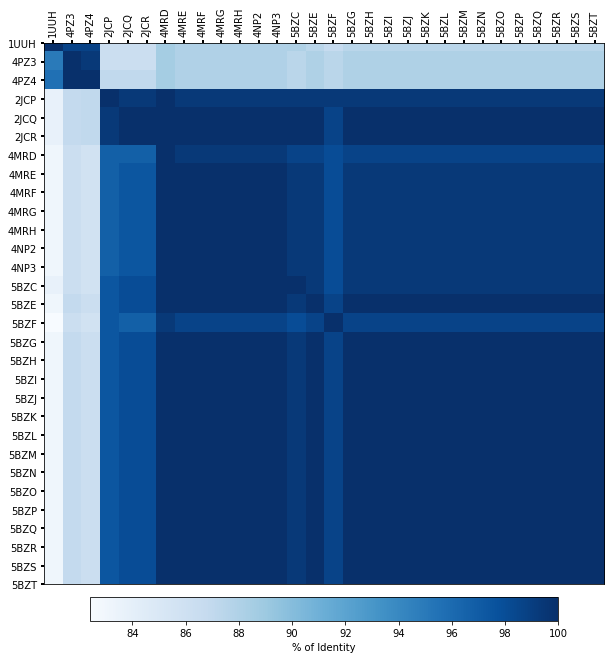

In [13]:
fig, ax = plt.subplots(figsize=(12,12))
plt.imshow (hmap,cmap='Blues', interpolation='nearest')
plt.xticks (targets.index,targets['PDB_id'],rotation=90)
plt.yticks (targets.index,targets['PDB_id'])
ax.xaxis.tick_top()
m=plt.colorbar(shrink=0.7,orientation='horizontal',spacing='uniform',pad=0.02)
m.set_label ('% of Identity')
plt.tick_params ('both',width=2,labelsize=10)
plt.savefig('../CD44_crystal_structures/aligment_hmap.svg',quality=95,dpi=600,format='svg',transparent=False)
plt.show()